In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz

def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [2]:
df = pd.read_csv("train.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df = df[df["days"] != -1]
df = df[df["height"] > 10 ]
df

,campaign_id,chain_id,start_date,end_date,format,device,height,width,iremoteid,days,start_day,end_day,shop,budget
0,8963,12,2019-07-21,2019-07-24,banner,DESKTOP,200.0,995.0,['31834'],5.0,7.0,3.0,0.0,3579.344177
1,11875,11,2020-09-01,2020-09-05,butterfly,DESKTOP,486.0,278.0,['C75204'],6.0,2.0,6.0,0.0,5251.781250
2,25899,11,2020-10-29,2020-11-24,butterfly,DESKTOP,488.0,265.0,['CB9645'],28.0,4.0,2.0,0.0,9814.411865
3,25458,10,2020-12-09,2020-12-15,banner,DESKTOP,150.0,1200.0,['C111392'],8.0,3.0,2.0,0.0,11428.571429
4,35293,12,2019-11-14,2019-12-26,banner,DESKTOP,200.0,995.0,['34341'],44.0,4.0,4.0,0.0,9328.322937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,33169,12,2019-07-03,2019-07-21,banner,DESKTOP,200.0,995.0,['31150'],20.0,3.0,7.0,0.0,10250.965576
6316,306,11,2020-04-23,2020-05-18,butterfly,DESKTOP,488.0,270.0,"['CB7692', 'CB7693']",27.0,4.0,1.0,0.0,8835.427002
6317,32436,11,2020-11-09,2020-11-17,butterfly,DESKTOP,486.0,273.0,['C104835'],10.0,1.0,2.0,0.0,7412.225952
6318,12732,12,2021-04-27,2021-07-04,butterfly,DESKTOP,298.0,398.0,['C144616'],70.0,2.0,7.0,0.0,19275.559998


In [3]:
# load the dataset
y = df["budget"]
X = df.iloc[:,:len(df.columns)-1]
X["surface"] = X["width"]*X["height"]
X['campaign_id']=X['campaign_id'].astype('category').cat.codes
X['chain_id']=X['chain_id'].astype('category').cat.codes
X['iremoteid']=X['iremoteid'].astype('category').cat.codes
X['shop']=X['shop'].astype('category').cat.codes
X["start_date"]=X["start_date"].astype('category').cat.codes
X["end_date"]=X["end_date"].astype('category').cat.codes
X["end_day"]=X["end_day"].astype('category').cat.codes
X["start_day"]=X["start_day"].astype('category').cat.codes
X["format"]=X["format"].astype('category').cat.codes
X["device"]=X["device"].astype('category').cat.codes
X

,campaign_id,chain_id,start_date,end_date,format,device,height,width,iremoteid,days,start_day,end_day,shop,surface
0,1821,3,70,75,0,0,200.0,995.0,1322,5.0,6,2,0,199000.0
1,2279,2,398,430,1,0,486.0,278.0,5572,6.0,1,5,0,135108.0
2,4569,2,454,505,1,0,488.0,265.0,6091,28.0,3,1,0,129320.0
3,4502,1,493,526,0,0,150.0,1200.0,2215,8.0,2,1,0,180000.0
4,6027,3,152,204,0,0,200.0,995.0,1405,44.0,3,3,0,199000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,5695,3,58,72,0,0,200.0,995.0,1292,20.0,2,6,0,199000.0
6316,150,2,280,327,1,0,488.0,270.0,6068,27.0,3,0,0,131760.0
6317,5595,2,464,498,1,0,486.0,273.0,2093,10.0,0,1,0,132678.0
6318,2427,3,623,716,1,0,298.0,398.0,2994,70.0,1,6,0,118604.0


In [4]:
X['format'].value_counts()

1    3380
8     969
6     940
0     664
7     273
5      50
4      23
3      15
2       4
Name: format, dtype: int64

RMSE: 19724.267221217968
R-squared score (training): 0.489
R-squared score (test): 0.476
Feature 0: 1088.352742
Feature 1: 414.610800
Feature 2: 1892.931111
Feature 3: 450.320041
Feature 4: 570.838337
Feature 5: 358.062702


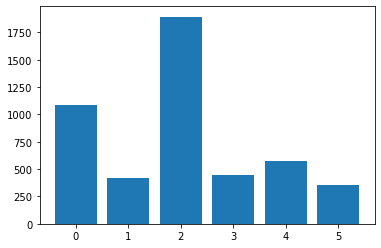

In [5]:
X["days*days"] = X["days"] * X["days"]
X=X[["days","format","surface","height","width","days*days"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

y_predicted = linreg.predict(X_test)
RMSE = mean_squared_error(y_test, y_predicted, squared=False)

print("RMSE:" , RMSE)
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = [{"max_iter":[100,200,1000,5000,10000],"alpha":[0.01,0.1,1,10,100]}]

clf = GridSearchCV(Lasso(), parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 833191002787.9973, tolerance: 333166706.9616064
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 903615677591.0417, tolerance: 348832386.80346656
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 859143360147.5107, tolerance: 342612322.68101305
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832994088062.3104, tolerance: 333166706.9616064
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 903472540420.9578, tolerance: 348832386.80346656
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 858557612089.5468, tolerance: 342612322.68101305
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

{'alpha': 0.01, 'max_iter': 100}


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1088236513639.3561, tolerance: 425888275.56185746
  model = cd_fast.enet_coordinate_descent(


In [8]:
linlasso = Lasso().fit(X_train, y_train)

y_predicted = linreg.predict(X_test)
RMSE = mean_squared_error(y_test, y_predicted, squared=False)

print("RMSE:" , RMSE)
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))


RMSE: 19724.267221217968
R-squared score (training): 0.489
R-squared score (test): 0.476


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = [{"alpha":[0.01,0.1,1,10,100]}]

clf = GridSearchCV(Ridge(), parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)

In [ ]:
linridge = Ridge(alpha = 1).fit(X_train, y_train)

y_predicted = linreg.predict(X_test)
RMSE = mean_squared_error(y_test, y_predicted, squared=False)

print("RMSE:" , RMSE)
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

parameters = [{"alpha":[200,0.1,1,10,100]}]
poly = PolynomialFeatures(degree=3)

X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,random_state = 0)

clf = GridSearchCV(Ridge(), parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)


In [ ]:
poly = PolynomialFeatures(degree=8)

linreg = Ridge(alpha=10000).fit(X_train, y_train)
y_predicted = linreg.predict(X_test)
RMSE = mean_squared_error(y_test, y_predicted, squared=False)

print("RMSE:" , RMSE)
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))

In [11]:
df_to_predict = pd.read_csv("predictions.csv")
df_to_predict.drop("Unnamed: 0",axis=1,inplace=True)
df_to_predict["surface"] = df_to_predict["width"]*df_to_predict["height"]
df_to_predict["days*days"] = df_to_predict["days"]*df_to_predict["days"]
df_to_predict['campaign_id']=df_to_predict['campaign_id'].astype('category').cat.codes
df_to_predict['chain_id']=df_to_predict['chain_id'].astype('category').cat.codes
df_to_predict['iremoteid']=df_to_predict['iremoteid'].astype('category').cat.codes
df_to_predict['shop']=df_to_predict['shop'].astype('category').cat.codes
df_to_predict["start_date"]=df_to_predict["start_date"].astype('category').cat.codes
df_to_predict["end_date"]=df_to_predict["end_date"].astype('category').cat.codes
df_to_predict["end_day"]=df_to_predict["end_day"].astype('category').cat.codes
df_to_predict["start_day"]=df_to_predict["start_day"].astype('category').cat.codes
df_to_predict["format"]=df_to_predict["format"].astype('category').cat.codes
df_to_predict["device"]=df_to_predict["device"].astype('category').cat.codes
df_to_predict = df_to_predict[["days","format","surface","height","width","days*days"]]
y_predicted = linreg.predict(df_to_predict)
df_to_submit = pd.read_csv("sample_submission.csv")
df_to_submit["budget"] = y_predicted
df_to_submit.to_csv("linear.csv",index=False)